# Customer Churn Prediction:
A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
Your task as a data scientist would be to predict the propensity to churn for each customer.

## Data Dictionary
There are multiple variables in the dataset which can be cleanly divided into 3 categories:
#### I. Demographic information about customers

       •	customer_id - Customer id 
       •	vintage - Vintage of the customer with the bank in a number of days 
       •	age - Age of customer 
       •	gender - Gender of customer 
       •	dependents - Number of dependents 
       •	occupation - Occupation of the customer 
       •	city - City of the customer (anonymized) 
       
#### II. Customer Bank Relationship

       •	customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 
       •	branch_code - Branch Code for a customer account 
       •	days_since_last_transaction - No of Days Since Last Credit in Last 1 year 

#### III. Transactional Information
       •	current_balance - Balance as of today 
       •	previous_month_end_balance - End of Month Balance of previous month 
       •	average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 
       •	average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 
       •	current_month_credit - Total Credit Amount current month 
       •	previous_month_credit - Total Credit Amount previous month 
       •	current_month_debit - Total Debit Amount current month 
       •	previous_month_debit - Total Debit Amount previous month 
       •	current_month_balance - Average Balance of current month 
       •	previous_month_balance - Average Balance of previous month 
       •	churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msgn

In [2]:
# importing data  
churn_preds = pd.read_csv("churn_prediction.csv") 
churn_preds.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
churn_preds.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [4]:
churn_preds.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [10]:
len(churn_preds.dropna())

22067

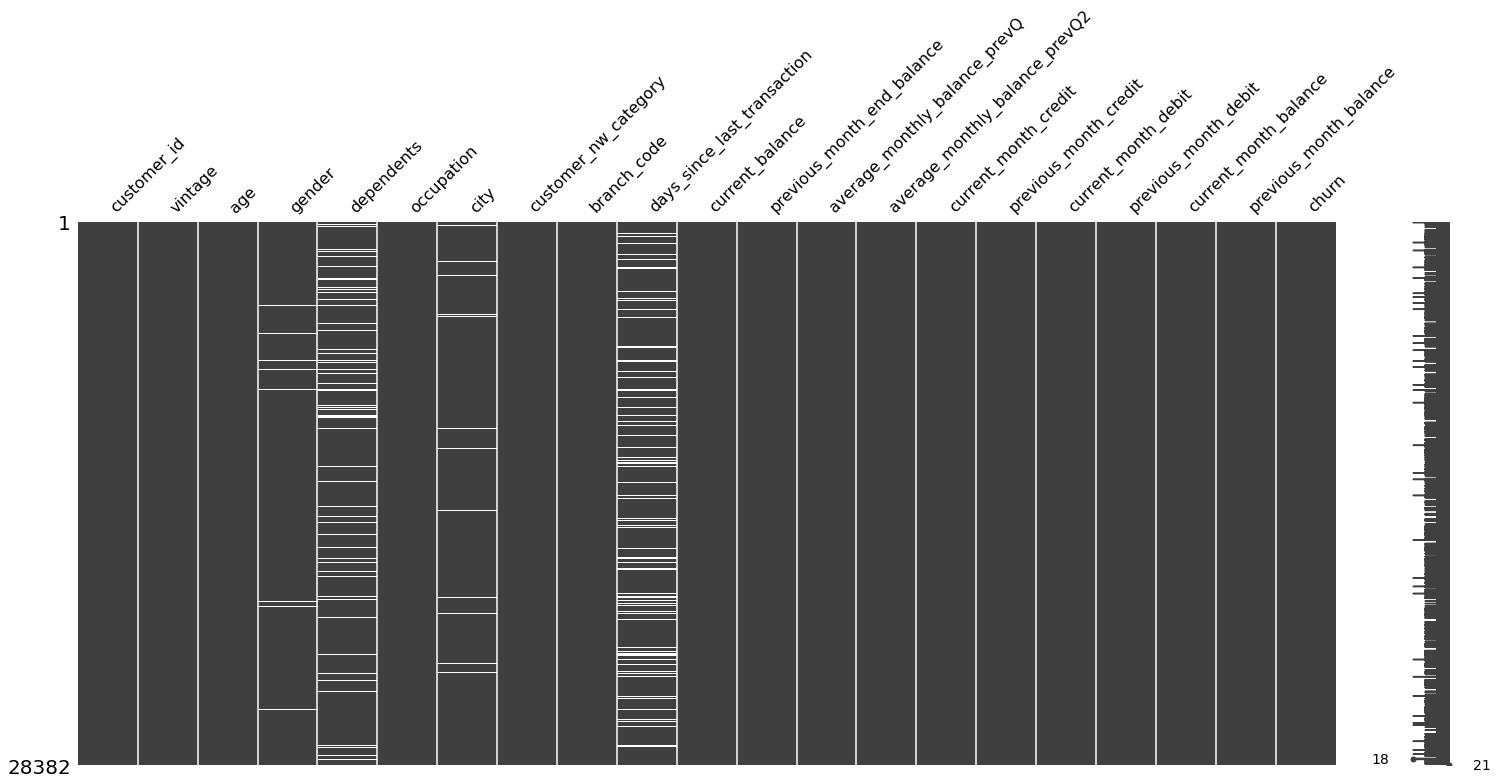

In [12]:
msgn.matrix(churn_preds);

In [ ]:
plt.plot(churn_preds)